# Launch Turi Create

In [15]:
import turicreate

# Load house sales data

In [16]:
sales = turicreate.SFrame('~/home_data.sframe/')

# Explore

In [ ]:
sales.show()

In [18]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Simple regression model that predicts price from square feet

In [19]:
training_set, test_set = sales.random_split(.8,seed=0)

## train simple regression model

In [20]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.006255     | 4332813.033902     | 2276894.506360       | 262245.696782                   | 275946.186000                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the quality of our model

In [23]:
print (test_set['price'].mean())

543054.0425632538


In [24]:
print (sqft_model.evaluate(test_set))

{'max_error': 4130503.7850410887, 'rmse': 255236.8787114364}


# Explore model a little further

In [25]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-50833.196507785,5052.151145821167
sqft_living,None,283.65312552747184,2.2201487907109874


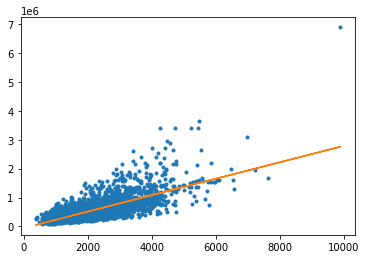

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

# Explore other features of the data

In [28]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [ ]:
sales[my_features].show()

In [30]:
turicreate.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Build a model with these additional features

In [31]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.048517     | 4073098.000220     | 1880219.110588       | 190518.353855                   | 163115.312100                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Compare simple model with more complex one

In [32]:
print (my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [33]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4130503.7850410887, 'rmse': 255236.8787114364}
{'max_error': 3135226.393838377, 'rmse': 180618.73648762793}


# Apply learned models to make predictions

In [34]:
house1 = sales[sales['id']=='5309101200']

In [36]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [37]:
print (house1['price'])

[620000.0, ... ]


In [38]:
print (sqft_model.predict(house1))

[629934.3047581475]


In [39]:
print (my_features_model.predict(house1))

[729549.396009578]


## Prediction for a second house, a fancier one

In [40]:
house2 = sales[sales['id']=='1925069082']

In [41]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [42]:
print (sqft_model.predict(house2))

[1265317.3059396844]


In [43]:
print (my_features_model.predict(house2))

[1233902.1852382463]


## Prediction for a super fancy home

In [44]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [45]:
print (my_features_model.predict(turicreate.SFrame(bill_gates)))

[15096568.798217334]


# Features: Zip code and target: price Use Linear Regression

In [46]:
turicreate.show(sales[1:5000]['zipcode'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

In [47]:
zipcode_model = turicreate.linear_regression.create(training_set,target='price',features=['zipcode'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 70

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.005642     | 6720297.330956     | 3999731.217511       | 285818.168989                   | 293020.077149                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [48]:
print (zipcode_model.evaluate(test_set))

{'max_error': 4854124.848481379, 'rmse': 268982.69109152956}


# Advanced Features and target: price Use Linear Regression

In [49]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition',  'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 
'sqft_living15', 'sqft_lot15' ]

In [51]:
advanced_features_model = turicreate.linear_regression.create(training_set,target='price',features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.018340     | 4341627.918368     | 1253894.362668       | 162162.497145                   | 167444.252550                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [52]:
print (advanced_features_model.evaluate(test_set))

{'max_error': 3178048.052315955, 'rmse': 155408.21129694468}


## Average Sales of Zip code 98039

In [53]:
sales_zip = sales[sales['zipcode']=='98039']

In [54]:
sales_zip

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3625049014,2014-08-29 00:00:00+00:00,2950000.0,4.0,3.5,4860.0,23885.0,2.0,0
2540700110,2015-02-12 00:00:00+00:00,1905000.0,4.0,3.5,4210.0,18564.0,2.0,0
3262300940,2014-11-07 00:00:00+00:00,875000.0,3.0,1.0,1220.0,8119.0,1.0,0
3262300940,2015-02-10 00:00:00+00:00,940000.0,3.0,1.0,1220.0,8119.0,1.0,0
6447300265,2014-10-14 00:00:00+00:00,4000000.0,4.0,5.5,7080.0,16573.0,2.0,0
2470100110,2014-08-04 00:00:00+00:00,5570000.0,5.0,5.75,9200.0,35069.0,2.0,0
2210500019,2015-03-24 00:00:00+00:00,937500.0,3.0,1.0,1320.0,8500.0,1.0,0
6447300345,2015-04-06 00:00:00+00:00,1160000.0,4.0,3.0,2680.0,15438.0,2.0,0
6447300225,2014-11-06 00:00:00+00:00,1880000.0,3.0,2.75,2620.0,17919.0,1.0,0
2525049148,2014-10-07 00:00:00+00:00,3418800.0,5.0,5.0,5450.0,20412.0,2.0,0


In [55]:
sales_zip['price'].mean()

2160606.5999999996

## Number of houses between 2000 to 4000 sqft_living

In [56]:
sales_sqft_living = sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] <= 4000)]
sales_sqft_living.num_rows()

9118